# 10-K Filings Analysis Workflow

This notebook is dedicated to the analysis of 10-K filings obtained from the [SEC EDGAR database](https://www.sec.gov/edgar.shtml). To enhance efficiency, we're leveraging pre-cleaned 10-K documents provided by the [Notre Dame Software Repository for Accounting and Finance (SRAF)](https://sraf.nd.edu/sec-edgar-data/cleaned-10x-files/). These pre-processed documents reduce the initial data cleaning burden and facilitate a more focused analysis.

## Step 1: Acquisition and Initial Filtering of 10-K Documents

The initial phase involves downloading zip files from the SRAF, which contain a mix of 10-Q and 10-K filings for publicly traded companies in the U.S. Our goal in this step is to sift through these files to retain only the 10-K filings for subsequent analysis. The steps include:

1. Decompressing all zip files to access the contained documents.
2. Scanning each `.txt` document to identify 10-K filings, utilizing their uniform naming convention for identification.
3. Segregating and relocating any files that are not 10-Ks to a distinct directory, ensuring our primary working directory contains solely 10-K documents for each entity and corresponding fiscal year.

Following this, a selection of 10-K filings will be randomly chosen to form the sample size for detailed analysis.

## Step 2: Extraction of Specific Content from 10-K Filings

Our analysis is particularly focused on the "Risk Factors" segment, identified as Item 1A in 10-K filings. This section offers insights into the potential risks and challenges companies may face. To isolate this information, the following steps will be undertaken:

1. Thorough examination of each 10-K document to locate the "Risk Factors" section.
2. Extraction of the "Risk Factors" content from each document and saving it separately for in-depth analysis. This may involve saving the information in a new file or a database, depending on the requirements of the subsequent analysis.
3. Optionally, the original 10-K documents, post-extraction of the relevant sections, can be moved to a different directory for archiving purposes.

This focused approach on Item 1A aims to elucidate the risk landscapes of various companies, offering valuable insights into their operational and strategic vulnerabilities.



next step as mentioned befor check if item 1a is inside the file


In [16]:
import os
import shutil
import re  # Import the regular expressions library

def contains_keyword(file_path, pattern):
    """Check if the file contains the given pattern using regex."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()
            # Use re.search to look for the pattern in the file content
            if re.search(pattern, file_content, re.IGNORECASE):
                return True
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
    return False

def move_files_without_keyword(source_dir, dest_dir, pattern):
    """Move files that do not contain the regex pattern to the destination directory."""
    # Ensure the destination directory exists
    os.makedirs(dest_dir, exist_ok=True)

    # Counters for reporting
    total_files = 0
    moved_files = 0

    # Iterate over all .txt files in the source directory
    for filename in os.listdir(source_dir):
        if filename.endswith('.txt'):
            total_files += 1
            file_path = os.path.join(source_dir, filename)

            # If the file does not contain the keyword pattern, move it to the destination directory
            if not contains_keyword(file_path, pattern):
                shutil.move(file_path, os.path.join(dest_dir, filename))
                moved_files += 1

    print(f"Total .txt files processed: {total_files}")
    print(f"Files moved to '{dest_dir}': {moved_files}")

# Get the current working directory
project_root_dir = os.getcwd()

# Define the source and destination directories relative to the current working directory
source_dir = os.path.join(project_root_dir, 'SAMPLE_10Ks')
dest_dir = os.path.join(source_dir, '10K without item 1A')

# Define the regex pattern for "Item 1A" accounting for common variations
pattern = r'Item\s+1[Aa]'

# Move files that do not contain the pattern
move_files_without_keyword(source_dir, dest_dir, pattern)


Total .txt files processed: 327
Files moved to '/Users/christiannikolov/Downloads/New_Version/FS-Finance-Management/SAMPLE_10Ks/10K without item 1A': 0


renameing them

To rename each .txt file in the /content/drive/MyDrive/FrankfurtSchool/Guided_Studies_in_Financial_Management/SAMPLE_10Ks directory based on the pattern year_name_cik by extracting the year from the filename, and the company name and CIK number from the file's content, you can follow these steps:

Iterate through each .txt file in the specified directory.
Extract the year from the first 4 characters of the filename.
Read the file's content to find the company name and CIK number using regex.
Construct the new filename using the year_name_cik pattern.
Rename the file to the new filename.
Here's a Python script that implements these steps:

In [17]:
import os
import re

def extract_info_from_content(file_content):
    """Extract the company name and CIK number from the file's content."""
    # Regex patterns for company name and CIK
    company_pattern = r'COMPANY CONFORMED NAME:\s+(.*)\s'
    cik_pattern = r'CENTRAL INDEX KEY:\s+(\d+)\s'

    # Find company name
    company_match = re.search(company_pattern, file_content)
    company_name = company_match.group(1) if company_match else None

    # Normalize company name for filename (remove disallowed characters and shorten)
    if company_name:
        company_name = re.sub(r'[^\w\s]', '', company_name)  # Remove non-alphanumeric characters
        company_name = re.sub(r'\s+', '_', company_name)  # Replace spaces with underscores
        company_name = company_name[:50]  # Limit length for simplicity

    # Find CIK
    cik_match = re.search(cik_pattern, file_content)
    cik = cik_match.group(1) if cik_match else None

    return company_name, cik

def rename_files_in_directory(directory):
    """Rename files in the specified directory based on the year, company name, and CIK."""
    failed_files = []  # List to store files that failed to rename

    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            # Extract year from the filename
            year = filename[:4]

            # Construct the full path to the file
            file_path = os.path.join(directory, filename)

            try:
                # Read the file's content
                with open(file_path, 'r', encoding='utf-8') as file:
                    content = file.read()

                    # Extract company name and CIK from the content
                    company_name, cik = extract_info_from_content(content)

                    if company_name and cik:
                        # Construct the new filename
                        new_filename = f"{year}_{company_name}_{cik}.txt"
                        new_file_path = os.path.join(directory, new_filename)

                        # Rename the file
                        os.rename(file_path, new_file_path)
                        print(f"Renamed '{filename}' to '{new_filename}'")
                    else:
                        # Log the failure and add the file to the failed_files list
                        failed_files.append(filename)
                        print(f"Failed to rename '{filename}': Missing company name or CIK")
            except Exception as e:
                failed_files.append(filename)
                print(f"Error processing '{filename}': {e}")

    # Return the list of files that failed to rename for further investigation
    return failed_files

# Specify the directory containing the 10K files
project_root_dir = os.getcwd()
directory = os.path.join(project_root_dir, 'SAMPLE_10Ks')

# Rename the files in the directory and get the list of files that failed to rename
failed_files = rename_files_in_directory(directory)

if failed_files:
    print(f"\nFiles that could not be renamed: {len(failed_files)}")
    for file in failed_files:
        print(file)
else:
    print("\nAll files were successfully renamed.")


Renamed '2023_Cosmos_Group_Holdings_Inc_0001706509.txt' to '2023_Cosmos_Group_Holdings_Inc_0001706509.txt'
Renamed '2008_ESSEX_PORTFOLIO_LP_0001053059.txt' to '2008_ESSEX_PORTFOLIO_LP_0001053059.txt'
Renamed '2009_RENASANT_CORP_0000715072.txt' to '2009_RENASANT_CORP_0000715072.txt'
Renamed '2008_WALT_DISNEY_CO_0001001039.txt' to '2008_WALT_DISNEY_CO_0001001039.txt'
Renamed '2016_KennedyWilson_Holdings_Inc_0001408100.txt' to '2016_KennedyWilson_Holdings_Inc_0001408100.txt'
Renamed '2010_ALLBRITTON_COMMUNICATIONS_CO_0000889156.txt' to '2010_ALLBRITTON_COMMUNICATIONS_CO_0000889156.txt'
Renamed '2013_MOVIE_STUDIO_INC_0001109067.txt' to '2013_MOVIE_STUDIO_INC_0001109067.txt'
Renamed '2016_Eastside_Distilling_Inc_0001534708.txt' to '2016_Eastside_Distilling_Inc_0001534708.txt'
Renamed '2015_Citizens_Independent_Bancorp_Inc_0001553830.txt' to '2015_Citizens_Independent_Bancorp_Inc_0001553830.txt'
Renamed '2016_Ocean_Shore_Holding_Co_0001444397.txt' to '2016_Ocean_Shore_Holding_Co_0001444397.t

test if all the files have been renamed succesfully


In [18]:
failed_files

[]

placeholder for above if this would not be the case

cut the item 1a estimation and collect it in a new txt and for every 5000 a new txt is created:

this does not make sense and needs to be changed, becasue later we need to individually analyse the item 1a per company per year
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [19]:
from pathlib import Path
import re
import pandas as pd

# Initialize the source and output directories
project_root_dir = Path.cwd()
source_dir = project_root_dir / 'SAMPLE_10Ks'
output_dir = project_root_dir / 'SAMPLE_10Ks/Item_1A_Estimations'
output_dir.mkdir(parents=True, exist_ok=True)

# Define the target strings for "Item 1A" and "Item 1B"
targets_1a = ["ITEM 1A. RISK FACTORS", "ITEM 1A RISK FACTORS", "ITEM 1A.", "1A. RISK FACTORS", "1A RISK FACTORS"]
targets_1b = ["ITEM 1B. UNRESOLVED STAFF COMMENTS", "ITEM 1B UNRESOLVED STAFF COMMENTS", "ITEM 1B.", "1B. UNRESOLVED STAFF COMMENTS", "1B UNRESOLVED STAFF COMMENTS", "1B.", "ITEM 2"]

# DataFrame to log files that could not be processed or do not contain "Item 1A"
issues_df = pd.DataFrame(columns=['Filename', 'Reason'])

def find_section_end(content, targets):
    """Find the end of the section by locating the nearest subsequent target."""
    positions = [content.find(target) for target in targets if content.find(target) != -1]
    return min(positions) if positions else len(content)

def process_files():
    # Define the output file path
    output_file_path = output_dir / "all_item_1a_sections.txt"

    # Open the output file just once to write all sections
    with output_file_path.open('w', encoding='utf-8') as output_file:
        for file_path in source_dir.glob("*.txt"):
            try:
                # Extract details from the filename
                # Assuming filenames are structured as 'Year_CompanyName_CIK.txt'
                filename_parts = file_path.stem.split('_')  # Split the filename (without extension) by '_'
                if len(filename_parts) < 3:
                    raise ValueError(f"Filename {file_path.name} does not contain enough parts to extract year, company name, and CIK")

                year = filename_parts[0]
                cik = filename_parts[-1]
                company_name = '_'.join(filename_parts[1:-1])  # Company name might contain underscores

                # Read the content of the file
                content = file_path.read_text(encoding='utf-8', errors='ignore').upper()
                # Find the start of "Item 1A" section
                start_positions = [content.find(target) for target in targets_1a if content.find(target) != -1]
                start_pos = min(start_positions) if start_positions else -1

                if start_pos != -1:
                    # Find the end of "Item 1A" section
                    end_pos = find_section_end(content[start_pos:], targets_1b)
                    section = content[start_pos:start_pos + end_pos]

                    # Write the header with company details and the "Item 1A" section content
                    header = f"\n\n--- Start of Item 1A for {company_name}, CIK: {cik}, Year: {year} ---\n\n"
                    output_file.write(header + section + f"\n\n--- End of Item 1A for {company_name}, CIK: {cik}, Year: {year} ---\n\n")

                else:
                    # Log if "Item 1A" section is not found
                    issues_df.loc[len(issues_df)] = [file_path.name, "No 'Item 1A' section found"]

            except Exception as e:
                # Log any errors that occur during processing
                issues_df.loc[len(issues_df)] = [file_path.name, f"Error processing file: {e}"]

    print(f"All 'Item 1A' sections are combined into '{output_file_path.name}' with distinguishable patterns.")

process_files()

# Display or save the DataFrame of issues
if not issues_df.empty:
    print("Files with issues:")
    print(issues_df)


All 'Item 1A' sections are combined into 'all_item_1a_sections.txt' with distinguishable patterns.
Files with issues:
                                             Filename  \
0       2007_NETSMART_TECHNOLOGIES_INC_0001011028.txt   
1               2018_AGREE_REALTY_CORP_0000917251.txt   
2         2010_China_Unitech_Group_Inc_0001373846.txt   
3      2015_CAMERON_INTERNATIONAL_CORP_0000941548.txt   
4   2016_Santander_Drive_Auto_Receivables_Trust_20...   
5         2006_ASCENDANT_SOLUTIONS_INC_0001080029.txt   
6   2021_OLD_REPUBLIC_INTERNATIONAL_CORP_000007426...   
7                 2007_RADIOSHACK_CORP_0000096289.txt   
8                      2015_SNAPON_Inc_0000091440.txt   
9   2020_Drive_Auto_Receivables_Trust_20172_000171...   
10  2017_Santander_Drive_Auto_Receivables_Trust_20...   
11                    2011_SRKP_29_INC_0001423246.txt   
12            2009_Genmed_Holding_Corp_0001061688.txt   
13                2006_ERHC_Energy_Inc_0000799235.txt   

                        Re

now the keyword analysis can begin


the code below has not been ajusted yet the logic stays the same, firs tthe item 1a extraction need to be individualized






In [20]:
import pandas as pd
from collections import Counter
import re
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor

keywords = [
    "access control", "cybersecurity posture", "information", "legal liability", "data exfiltration",
            "security awareness training", "authorization", "phishing", "APT", "secure sockets layer",
            "threat intelligence", "zero trust architecture", "smishing", "whaling", "supply chain attack",
            "cryptojacking", "reputation", "identity management", "trojan", "security architecture", "firewall",
            "financial fraud", "botnet attack", "result", "patch management", "IoT security", "ransomware",
            "technology", "privacy breach", "SOC", "secure coding", "security information management", "NIST",
            "network access control", "operation", "breach", "security audit", "hack", "public key infrastructure",
            "DDoS", "malvertising", "CSRF", "endpoint security", "CIS Controls", "data privacy", "SIM",
            "social engineering", "cyber warfare", "computer", "disruption", "spear phishing", "application security",
            "cybersecurity strategy", "zero-day", "identity theft", "hardware security", "insider threat",
            "blockchain security", "PKI", "damage", "ransomware-as-a-service", "threat hunting",
            "intellectual property theft", "financial", "antivirus", "exploit", "MFA", "CCPA",
            "cybersecurity insurance", "threat landscape", "service", "phishing attack", "cybersecurity regulation",
            "RCE", "brand damage", "NAC", "cross-site request forgery", "cyber resilience", "system",
            "risk management", "biometric security", "cybersecurity audit", "cyber hygiene", "SSL", "trust erosion",
            "cyber law", "data", "business", "failure", "network security", "regulatory fines", "FISMA",
            "vulnerability", "security operations center", "IoT attack", "spyware", "cyber espionage",
            "quantum cryptography", "PCI DSS", "encryption", "include", "shadow IT", "cloud security", "malware",
            "penetration testing", "cybersecurity framework", "GDPR", "cyber threat intelligence", "ISO 27001",
            "incident response", "HIPAA", "mobile security", "security by design", "unauthorized", "loss",
            "customer", "transport layer security", "security", "espionage", "secure shell", "RaaS", "digital forensics",
            "security policy", "risk assessment", "remote code execution", "compliance violation", "cybersecurity policy",
            "vishing", "SSH", "authentication", "TLS", "VPN", "fileless malware", "intrusion"
]

# Define the path to the 'all_item_1a_sections.txt' file
input_file_path = Path.cwd() / 'SAMPLE_10Ks/Item_1A_Estimations/all_item_1a_sections.txt'

# Function to count occurrences of keywords in a text
def count_keywords(text, keywords):
    words = re.findall(r'\b\w+\b', text.lower())  # Split text into words, considering only whole words
    return Counter(word for word in words if word in keywords)

def process_section(section_data):
    company_name, cik, year, section_text = section_data
    
    # Initialize keyword counts to 0
    keyword_counts = {keyword: 0 for keyword in keywords}
    
    # Update counts with actual occurrences
    found_keywords = count_keywords(section_text, keywords)
    keyword_counts.update(found_keywords)
    
    return {
        'Company': company_name,
        'CIK': cik,
        'Year': year,
        **keyword_counts  # Unpack the keyword counts into the dictionary
    }

# Read the combined 'Item 1A' sections file
with input_file_path.open('r', encoding='utf-8') as file:
    content = file.read()

# Split the content by the pattern marking the start of each section
sections = re.split(r'--- Start of Item 1A for (.+?), CIK: (\d+), Year: (\d{4}) ---', content)

# Prepare data for multithreading
section_data_list = [(sections[i], sections[i+1], sections[i+2], sections[i+3]) for i in range(1, len(sections), 4)]

# Use ThreadPoolExecutor to process sections in parallel
results = []
with ThreadPoolExecutor() as executor:
    future_to_section = {executor.submit(process_section, data): data for data in section_data_list}
    for future in future_to_section:
        results.append(future.result())

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame or save it to a CSV
print(results_df.head())  # Display the first few rows of the DataFrame

# Define the output directory and file path for saving the results
output_dir = Path.cwd() / 'SAMPLE_10Ks/Keyword_Analysis'
output_dir.mkdir(parents=True, exist_ok=True)  # Ensure the output directory exists
results_csv_path = output_dir / 'Keyword_Analysis_Results.csv'

# Save the DataFrame to a CSV file
results_df.to_csv(results_csv_path, index=False)
print(f"Analysis results saved to {results_csv_path}")


                      Company         CIK  Year  access control  \
0   Cosmos_Group_Holdings_Inc  0001706509  2023               0   
1          ESSEX_PORTFOLIO_LP  0001053059  2008               0   
2               RENASANT_CORP  0000715072  2009               0   
3              WALT_DISNEY_CO  0001001039  2008               0   
4  KennedyWilson_Holdings_Inc  0001408100  2016               0   

   cybersecurity posture  information  legal liability  data exfiltration  \
0                      0           15                0                  0   
1                      0            2                0                  0   
2                      0            0                0                  0   
3                      0            0                0                  0   
4                      0            0                0                  0   

   security awareness training  authorization  ...  remote code execution  \
0                            0              0  ...       

use the excel which i have put in the what app group to get the logic and create the normlization and the logistic regression


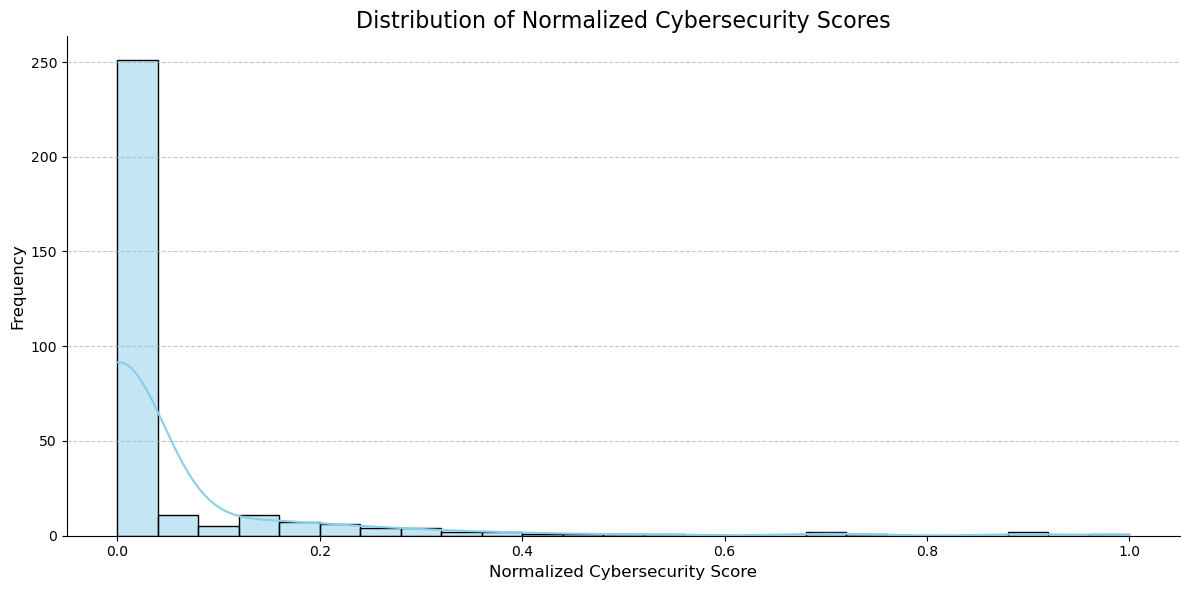

Enhanced analysis results with normalized and logistic scores saved to /Users/christiannikolov/Downloads/New_Version/FS-Finance-Management/Analysis_Results/Enhanced_Keywords_with_Normalized_and_Logistic_Scores.csv.


In [21]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Assuming `results_df` is loaded and structured with keyword counts

# Ensure all keyword columns are in the DataFrame, filled with 0s for missing values
for keyword in keywords:
    if keyword not in results_df.columns:
        results_df[keyword] = 0

# Calculate total keyword frequencies across all documents
keyword_frequencies = results_df[keywords].sum()

# Calculate the total of all keyword frequencies to determine weights
total_keyword_frequency = keyword_frequencies.sum()

# Determine weights for each keyword
keyword_weights = keyword_frequencies / total_keyword_frequency

# Initialize a dictionary to hold the weighted columns data
weighted_columns_data = {}

# Calculate weighted counts for each document and store in the dictionary
for keyword in keywords:
    weighted_column_name = f'{keyword}_Weighted'
    weighted_columns_data[weighted_column_name] = results_df[keyword] * keyword_weights[keyword]

# Create a new DataFrame from the weighted columns data
weighted_columns_df = pd.DataFrame(weighted_columns_data)

# Concatenate the new DataFrame with the original `results_df`
results_df = pd.concat([results_df, weighted_columns_df], axis=1)

# Calculate the total weighted count and add it to `results_df`
results_df['Total_Weighted_Count'] = weighted_columns_df.sum(axis=1)

# Normalize the total weighted counts using min-max scaling to get the cybersecurity score between 0 and 1
min_weighted_count = results_df['Total_Weighted_Count'].min()
max_weighted_count = results_df['Total_Weighted_Count'].max()
results_df['Normalized_Cybersecurity_Score'] = (results_df['Total_Weighted_Count'] - min_weighted_count) / (max_weighted_count - min_weighted_count)

# Calculate Z-Scores for the normalized cybersecurity scores
results_df['Normalized_Cybersecurity_Score_Z'] = zscore(results_df['Normalized_Cybersecurity_Score'])

# Initialize a dictionary to hold logistic transformation data
logistic_columns_data = {}

# Mean of the total weighted count for use in logistic transformations
mean_total_weighted_count = results_df['Total_Weighted_Count'].mean()

# Apply the logistic function for each keyword's weighted frequency
for keyword in keywords:
    weighted_column = f'{keyword}_Weighted'
    logistic_column_name = f'{keyword}_Logistic'
    logistic_columns_data[logistic_column_name] = 1 / (1 + np.exp(-(results_df[weighted_column] - mean_total_weighted_count)))

# Create a new DataFrame from the logistic transformation data
logistic_columns_df = pd.DataFrame(logistic_columns_data)

# Concatenate the new DataFrame with the original `results_df`
results_df = pd.concat([results_df, logistic_columns_df], axis=1)

# Visualization of Normalized Cybersecurity Scores
plt.figure(figsize=(12, 6))
sns.histplot(results_df['Normalized_Cybersecurity_Score'], bins=25, kde=True, color='skyblue')
plt.title('Distribution of Normalized Cybersecurity Scores', fontsize=16)
plt.xlabel('Normalized Cybersecurity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Define the output directory for saving the analysis results
output_dir = Path.cwd() / 'Analysis_Results'
output_dir.mkdir(parents=True, exist_ok=True)  # Creates the directory if it doesn't exist

# Save the enhanced DataFrame with normalized cybersecurity scores and logistic transformations to a CSV file
enhanced_with_normalized_scores_path = output_dir / "Enhanced_Keywords_with_Normalized_and_Logistic_Scores.csv"
results_df.to_csv(enhanced_with_normalized_scores_path, index=False)
print(f"Enhanced analysis results with normalized and logistic scores saved to {enhanced_with_normalized_scores_path}.")
